# Classificadores

## Intalando modulo imblearn
`docker-compose exec jupyter python3 -m pip install imbalanced-learn`

In [1]:
import pandas as pd
from scripts.grafico_predicao import GraficoPredicao

In [2]:
arq = '../data/teste.csv'
alvo = 'categoria_situacao'
campos = [
'carga_horaria',
'codigo_municipio_dv',
'codigo_unidade_ensino_sistec',
'cor_raca',
'data_matricula',
'faixa_etaria',
'fim_ciclo',
'idade',
'inicio_ciclo',
'mes_ocorrencia',
'municipio',
'renda_familiar',
'total_inscritos',
'unidade_ensino',
'vagas_ofertadas',
]
filtro = ['Concluintes','Evadidos']
df = pd.read_csv(arq)
df = df[df[alvo].isin(filtro)]
preditores = []

In [3]:
from scripts.predicao_tree import PredicaoTree
pt = PredicaoTree(df, alvo)
pt.nomeCampos = campos
preditores.append(pt)
pt.iniciar()

,holdout,corss
accuracy,0.852278,0.747970
precision,0.894331,0.810891
recall,0.890754,0.830720
roc_auc,0.828955,0.696957
f1,0.892539,0.819032


In [4]:
from scripts.predicao_random_forest import PredicaoRandomForest
rf = PredicaoRandomForest(df,alvo)
rf.nomeCampos = campos
preditores.append(rf)
rf.iniciar()

,holdout,corss
accuracy,0.875672,0.778283
precision,0.911329,0.828274
recall,0.907803,0.860280
roc_auc,0.856194,0.832666
f1,0.909563,0.842159


In [5]:
from scripts.predicao_naive import PredicaoNaive
nb = PredicaoNaive(df,alvo)
nb.nomeCampos = campos
preditores.append(nb)
nb.iniciar()

,holdout,corss
accuracy,0.615273,0.609080
precision,0.739316,0.737595
recall,0.681770,0.674216
roc_auc,0.574963,0.610429
f1,0.709378,0.703204


In [7]:
from scripts.predicao_multilayer_perceptron import PredicaoMultilayerPerceptron
mp = PredicaoMultilayerPerceptron(df,alvo)
mp.nomeCampos = campos
preditores.append(mp)
mp.iniciar()

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptro

,holdout,corss
accuracy,0.767421,0.720882
precision,0.801637,0.778637
recall,0.880066,0.832406
roc_auc,0.699136,0.763432
f1,0.839022,0.803936


/opt/conda/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/opt/conda/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: Confusio

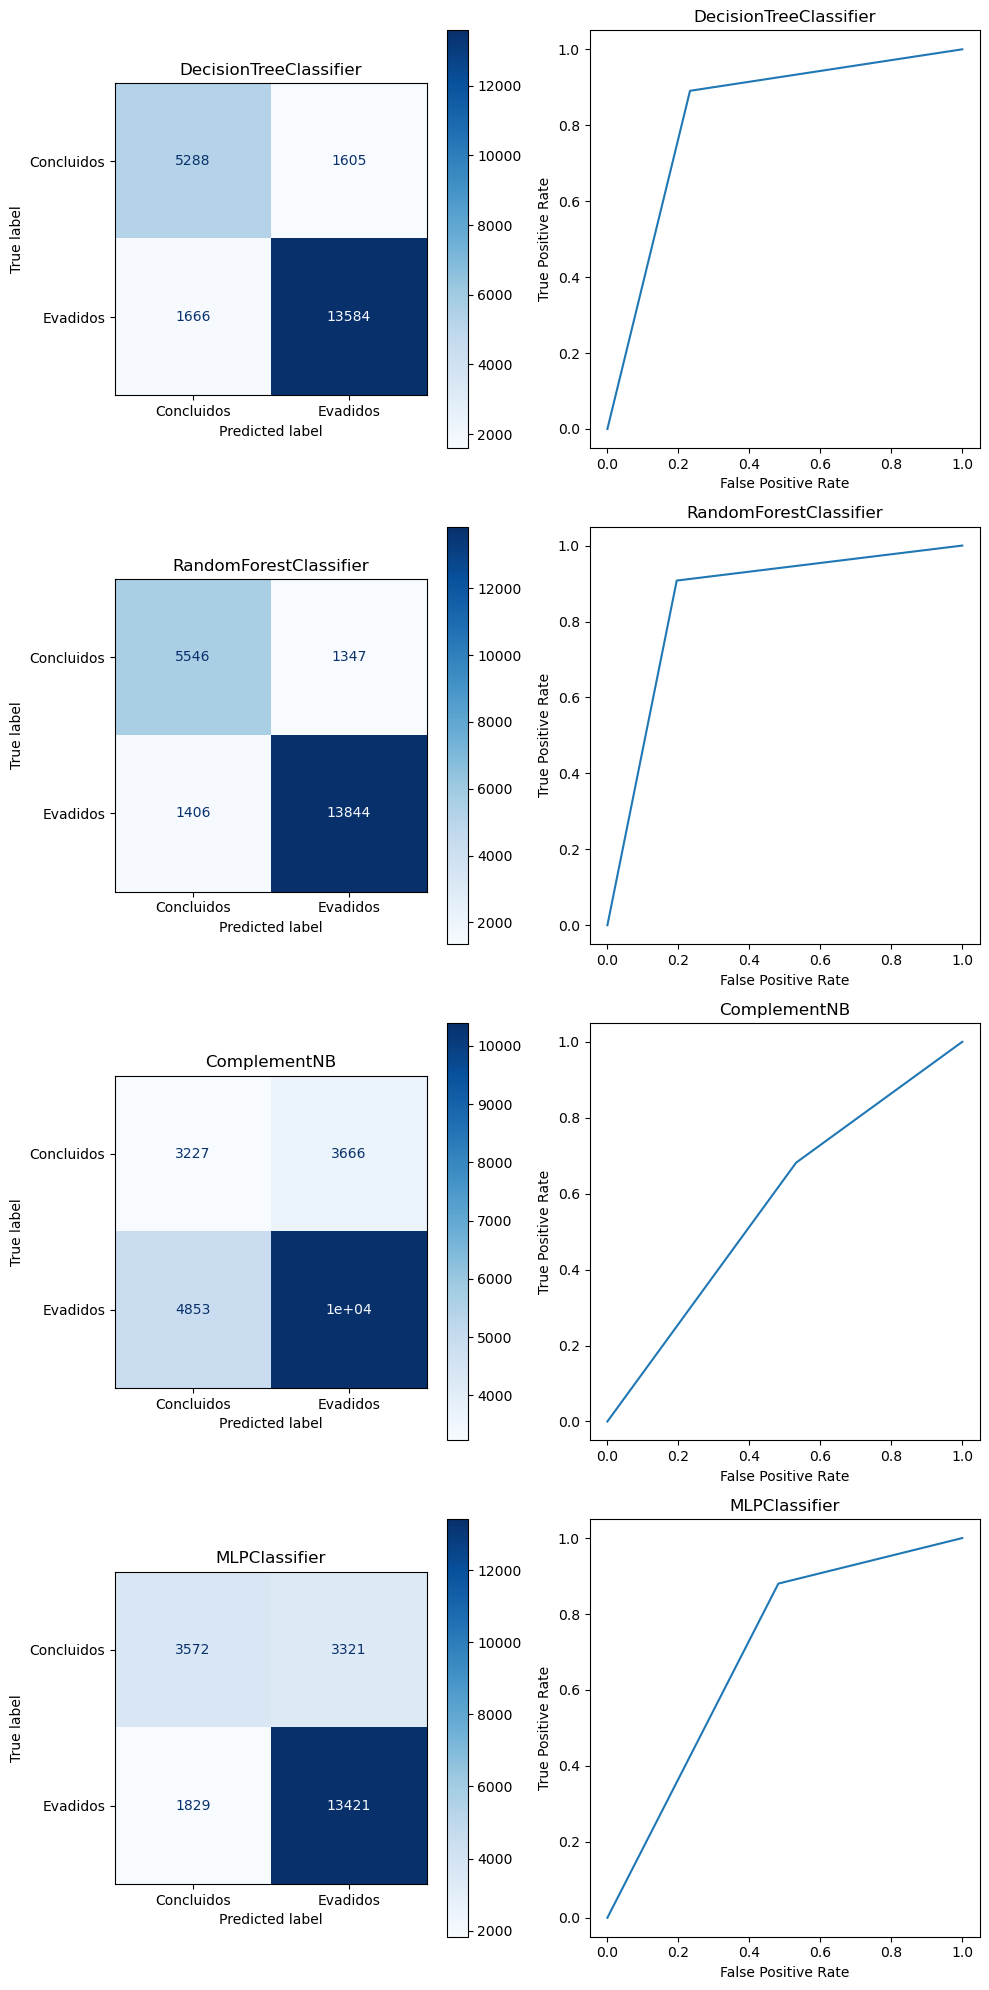

In [8]:
gp = GraficoPredicao(preditores)
gp.mostrarGraficos()